Model Performance:
Mean Squared Error (MSE): 254.61
R² Score: 0.954

Model Coefficients:
I: -87.908
T: -9.088
Hydrogen: 5.916
Oxygen: 14.343
Intercept: 408.814


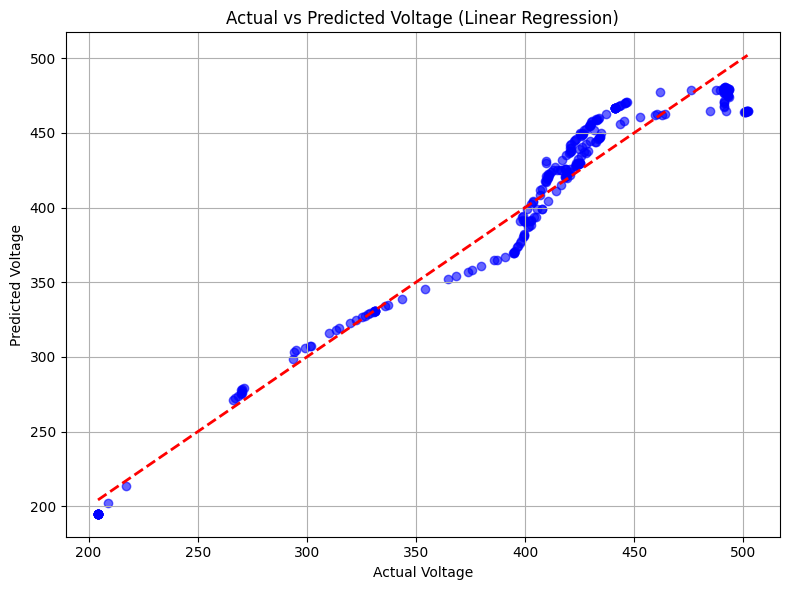

['scaler_pemfc.pkl']

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib  # For saving the model

# Step 1: Load the Excel file
df = pd.read_csv(r'D:\Coding\Major-Project\new_\data\PEMfuel cell.csv')

# Step 2: Drop missing values (if any)
df.dropna(inplace=True)

# Step 3: Define features and target
features = ['I', 'T', 'Hydrogen', 'Oxygen']
X = df[features]
y = df['V']  # Target: Voltage

# Step 4: Split data into training and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 5: Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Train linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Step 7: Make predictions
y_pred = model.predict(X_test_scaled)

# Step 8: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.3f}")

# Step 9: Coefficients and intercept
print("\nModel Coefficients:")
for feat, coef in zip(features, model.coef_):
    print(f"{feat}: {coef:.3f}")
print(f"Intercept: {model.intercept_:.3f}")

# Step 10: Plot predictions vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Voltage')
plt.ylabel('Predicted Voltage')
plt.title('Actual vs Predicted Voltage (Linear Regression)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Save model and scaler for reuse
joblib.dump(model, "linear_model_pemfc.pkl")
joblib.dump(scaler, "scaler_pemfc.pkl")